In [1]:
#import json
#import glob
#import os
#from pathlib import Path

from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
#from epilepsypcm.utils.outcome_params import engel_score

from epilepsypcm.models.base_models import *
from sklearn.metrics import auc

In [2]:
#Location
base_path = '/Users/shrey2/Downloads/epilepsy_data/' #modify for your file location

#Function to get a list of all dataframes for all positive patients, in the format [patient number, df]
df_list = get_df_list(base_path, "1")

#Function to get the concatenated dataframe for all positive patients
## balance parameter can be changed to "None", "upsample", or "downsample"
all_positive_patients = concat_dfs(base_path, "1", balance = "Downsample")

/Users/shrey2/Documents/PCM/epilepsypcm/epilepsypcm/utils/make_df.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["outcome"][df["chNames"] == channel] = 1


In [3]:
all_positive_patients.head()

,chNames,significant,n1Zscore,n2Zscore,p2Zscore,n1Latency,n2Latency,p2Latency,flipped,outcome
1079,RPHG03_RPHG04,1.0,-25.844707,-11.574456,24.883021,39.0,121.0,59.0,0.0,0.0
1301,RA10_RA11,0.0,-2.364876,-4.669449,5.657711,101.0,631.0,426.0,0.0,0.0
3104,ALS01_ALS02,0.0,2.711632,1.142021,0.032649,15.0,101.0,77.0,1.0,0.0
1618,LOF12_LOF13,0.0,-2.196629,-0.391798,1.775902,11.0,157.0,140.0,0.0,0.0
966,LIN02_LIN03,0.0,1.493684,1.763983,-1.565146,11.0,315.0,75.0,1.0,0.0


# All Models

### ROC Curves

Linear Regression - Number of mislabeled points out of a total 1416 points : 658
Naive Bayes - Number of mislabeled points out of a total 1416 points : 664
Random Forest - Number of mislabeled points out of a total 1416 points : 619
[00:03:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost - Number of mislabeled points out of a total 1416 points : 612
Adaboost - Number of mislabeled points out of a total 1416 points : 632
SVM - Number of mislabeled points out of a total 1416 points : 675


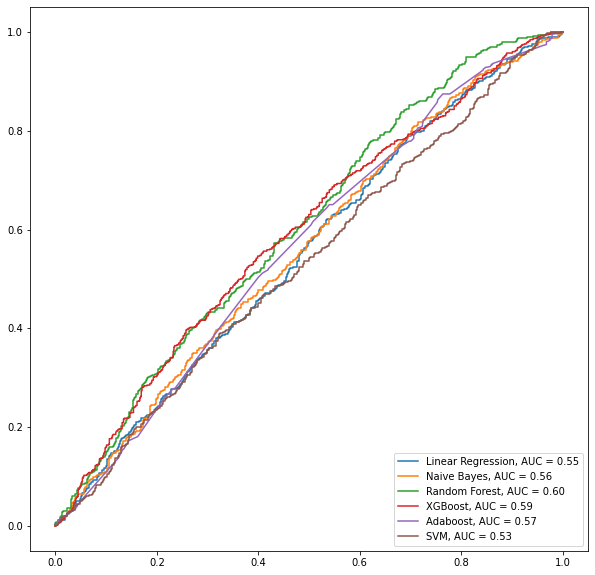

In [10]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
p

#linear regression
lr, tpr, fpr, precision, recall = linear_regression(all_positive_patients, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Linear Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, tpr, fpr, precision, recall = naive_bayes(all_positive_patients, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, tpr, fpr, precision, recall = random_forest(all_positive_patients, max_depth, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, tpr, fpr, precision, recall = xgboost(all_positive_patients, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, tpr, fpr, precision, recall = adaboost(all_positive_patients, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, tpr, fpr, precision, recall = svm(all_positive_patients, C, epsilon, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



### PR Curves

Linear Regression - Number of mislabeled points out of a total 1416 points : 658
Naive Bayes - Number of mislabeled points out of a total 1416 points : 664
Random Forest - Number of mislabeled points out of a total 1416 points : 619
[00:03:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost - Number of mislabeled points out of a total 1416 points : 612
Adaboost - Number of mislabeled points out of a total 1416 points : 632
SVM - Number of mislabeled points out of a total 1416 points : 675


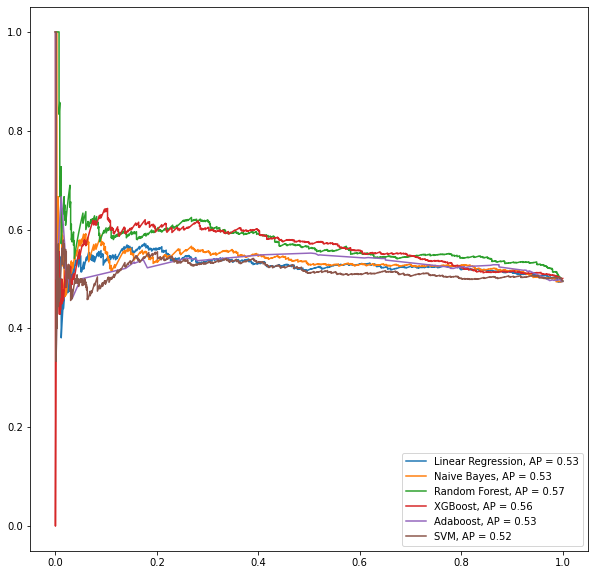

In [11]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))

#linear regression
lr, tpr, fpr, precision, recall = linear_regression(all_positive_patients, plot_roc, plot_pr)
plt.plot(recall, precision, label='Linear Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, tpr, fpr, precision, recall = naive_bayes(all_positive_patients, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, tpr, fpr, precision, recall = random_forest(all_positive_patients, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, tpr, fpr, precision, recall = xgboost(all_positive_patients, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, tpr, fpr, precision, recall = adaboost(all_positive_patients, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, tpr, fpr, precision, recall = svm(all_positive_patients, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')



# Individual Models

### Linear Regression

Number of mislabeled points out of a total 1416 points : 658


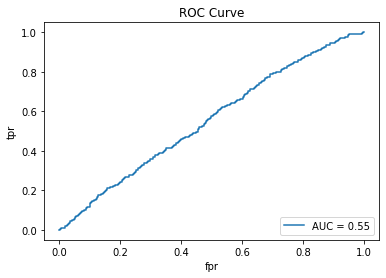

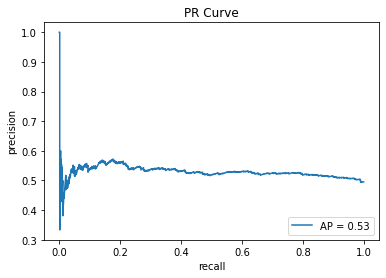

In [4]:
plot_roc = True
plot_pr = True

lr, tpr, fpr, precision, recall = linear_regression(all_positive_patients, plot_roc, plot_pr)

### Naive Bayes

Number of mislabeled points out of a total 1416 points : 664


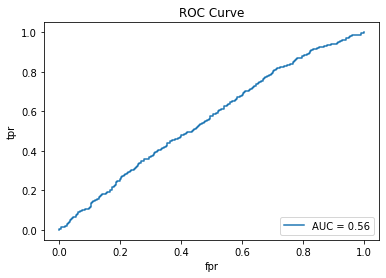

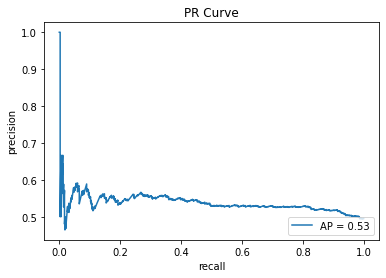

In [5]:
plot_roc = True
plot_pr = True
gnb, tpr, fpr, precision, recall = naive_bayes(all_positive_patients, plot_roc, plot_pr)

### Random Forest

Number of mislabeled points out of a total 1416 points : 619


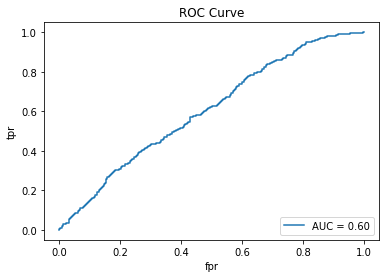

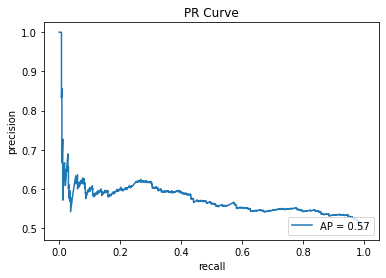

In [6]:
max_depth = 10
plot_roc = True
plot_pr = True
rf, tpr, fpr, precision, recall = random_forest(all_positive_patients, max_depth, plot_roc, plot_pr)

### XGBoost

/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:10:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of mislabeled points out of a total 1416 points : 612


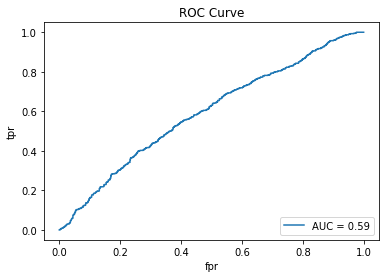

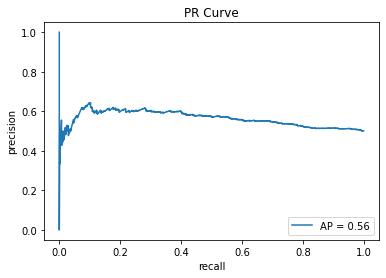

In [7]:
learning_rate = 0.5
max_depth = 10
n_estimators = 10
plot_roc = True
plot_pr = True
xgb, tpr, fpr, precision, recall = xgboost(all_positive_patients, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)

### Adaboost

Number of mislabeled points out of a total 1416 points : 632


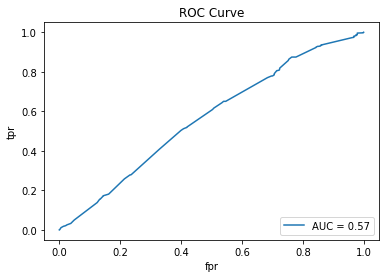

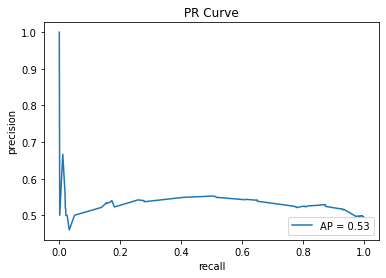

In [8]:
n_estimators = 10
plot_roc = True
plot_pr = True
ada, tpr, fpr, precision, recall = adaboost(all_positive_patients, n_estimators, plot_roc, plot_pr)

### SVM

SVM - Number of mislabeled points out of a total 1416 points : 675


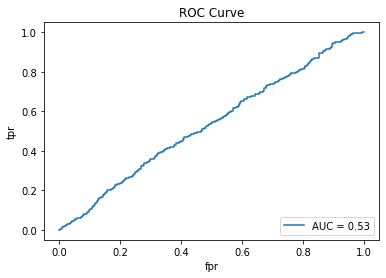

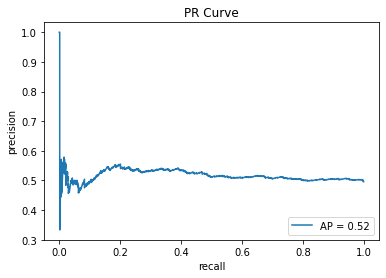

In [6]:
C = 0.7
epsilon = 0.2
plot_roc = True
plot_pr = True
sv, tpr, fpr, precision, recall = svm(all_positive_patients, C, epsilon, plot_roc, plot_pr)

### MLP

### GAN